# <center>COMPUTER VISION - LENET MODEL</center>
***
## <font color = blue>I. DATA PREPARATION</font>
> A. LIBRARIES<br>
> B. CONSTANTS<br>
> C. COLLECTING DATA AND CREATING DICTIONARIES<br>
> D. SPLIT BETWEEN TRAINING SET AND TEST SET<br>
> E. DATA PREPARATION WITH PREPROCESSING<br>

## <font color = blue>II. CALL BACKS</font>
> A. AUTOMATIC REDUCTION OF THE LEARNING RATE<br>
> B. EARLY STOPPING<br>

## <font color = blue>III. LENET MODEL</font>
> A. CREATION OF LENET MODEL<br>
> B. COMPILING AND TRAINING<br>
> C. TRAINING HISTORY<br>
> D. CONFUSION MATRIX<br>
> E. CLASSIFICATION REPORT<br>
***
##### Additional information before to get started :
* Resolution choosen for the tests : (28, 28, 1).
* The Lenet model is well known and working efficiently for MNIST dataset (MNIST images are 28 × 28 pixels).

##### Laptop specification :
* OS: Windows 11
* Processor: AMD Ryzen 7 5800HS with Radeon Graphics 3.20 GHz
* Installed RAM: 16,0 GB
* GPU: NVIDIA GetForce RTX3080 8GB
***

## <font color = blue>I. DATA PREPARATION</font>
> A. LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from time import time

from helpers import load_image, show_wrong_predictions, confusion_matrix, global_classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import itertools

import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

> B. CONSTANTS

In [2]:
BATCH_SIZE       = 32                # Bacth size for dataset
TARGET_SIZE      = (28, 28)        # Resolution of images before training
CHANNELS         = 1                 # Number of channels (1 => grey, 3 => color) 
INPUT_SHAPE      = (28, 28, 1)     # Resolution of images with channels before training
IMAGES_DIRECTORY = '../data/final/'  # Directory where are located images

SAVED_WEIGHTS    = './model/model_LENET.h5'  # File name where are saved the final weights of the model

preprocess_input = lambda x : x / 255

> C. COLLECTING DATA AND CREATING DICTIONARIES

In [3]:
df = pd.read_csv('../data/data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,filename,url,description,type,filepath,scraped,old_filename,old_filepath,...,text_ocr,words_count,text_en,text_fr,text_fr_norm,text_en_norm,target_en,target_fr,target,target_min
0,0,0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg,...,FACTURE LOGO Joanna Binet 48 Coubertin 31400 ...,98,Invoice Logo Joanna Binet Coubertin Paris Invo...,Facture Logo Joanna Binet Coubertin Paris F...,facture logo joanna binet coubertin paris fact...,invoice logo joanna binet coubertin paris invo...,invoice,facture,invoice,invoice
1,1,1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg,...,Joanna Binet 48 Coubertin 31400 Paris FACTURE...,97,Joanna Binet Coubertin Paris Invoice Invoice i...,Joanna Binet Coubertin Paris Facture Factur...,joanna binet coubertin paris facture facturé c...,joanna binet coubertin paris invoice invoice c...,invoice,facture,invoice,invoice
2,2,2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,facture,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg,...,FACTURE Mon entreprise : Nom de la société Ad...,45,Invoice My company : Company name Mail address...,Facture Mon entreprise : Nom de la société Ad...,facture entreprise société adresse postale adr...,invoice company company name mail address tele...,invoice,facture,invoice,invoice
3,3,3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg,...,Joanna Binet 48 Coubertin 31400 Paris FACTURE...,99,Joanna Binet Coubertin Paris Bill To Cinderell...,Joanna Binet Coubertin Paris Facture À Cend...,joanna binet coubertin paris facture cendrillo...,joanna binet coubertin paris bill cinderella a...,invoice,facture,invoice,invoice
4,4,4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,facture,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg,...,Payer en ligne > FACTURE No SFIDELI F/05.2020...,157,Pay online Invoice No Sfideli F/ Creation date...,Payer en ligne Facture No Sfideli F/ Date de...,payer ligne facture sfideli date création date...,online invoice sfideli creation date validity ...,invoice,facture,invoice,invoice


In [4]:
df.shape

(1308, 27)

In [5]:
# Encode categorical features
encoder = LabelEncoder()
df['type_num'] = encoder.fit_transform(df.target_min)

In [6]:
df.target_min.unique()

array(['invoice', 'id piece', 'residence proof', 'passport', 'pay',
       'postcard', 'other_types', 'scientific_doc', 'resume',
       'specification', 'budget', 'file folder', 'email', 'questionnaire'],
      dtype=object)

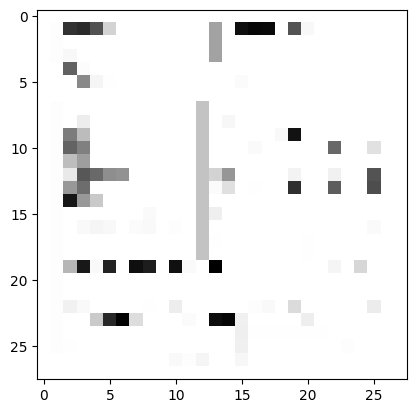

In [7]:
# Display a document randomly
num_alea = np.random.randint(len(df))

plt.imshow(load_image(directory = IMAGES_DIRECTORY,
                      filename = df.filename[num_alea],
                      channels = CHANNELS,
                      size = TARGET_SIZE,
                      preprocess = preprocess_input),
          cmap = 'gray');


> D. SPLIT BETWEEN TRAINING SET AND TEST SET

In [8]:
X_train_path, X_test_path, y_train, y_test = train_test_split(df.filename, df.type_num,
                                                              test_size = 0.2, random_state = 1234)

> E. DATA PREPARATION WITH PREPROCESSING

In [9]:
# Training dataset creation
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))
dataset_train = dataset_train.map(lambda x, y : [load_image(directory = IMAGES_DIRECTORY,
                                                            filename = x,
                                                            channels = CHANNELS,
                                                            size = TARGET_SIZE,
                                                            preprocess = preprocess_input), y],
                                  num_parallel_calls = -1)  # loading in multi-tasking

# Group by batch
dataset_train = dataset_train.batch(batch_size = BATCH_SIZE)


# Test dataset creation
dataset_test = tf.data.Dataset.from_tensor_slices((X_test_path, y_test))
dataset_test = dataset_test.map(lambda x, y : [load_image(directory = IMAGES_DIRECTORY,
                                                          filename = x,
                                                          channels = CHANNELS,
                                                          size = TARGET_SIZE,
                                                          preprocess = preprocess_input), y],
                                  num_parallel_calls = -1)  # loading in multi-tasking

# Group by batch
dataset_test = dataset_test.batch(batch_size = BATCH_SIZE)

C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [10]:
# Shape of one lot of dataset
X_t, y_t = next(iter(dataset_train))
print('Shape of the batch X_t :', X_t.shape)
print('Target elements of the batch :', y_t.numpy(), '\n')

Shape of the batch X_t : (32, 28, 28, 1)
Target elements of the batch : [ 8  9  8  7  3  5  7  8  3  4  7  5  6  3  3  6 10  8  3  3  7  8  8  8
  3  8  7  5  1  7  7  6] 



## <font color = blue>II. CALL BACKS</font>
> A. AUTOMATIC REDUCTION OF THE LEARNING RATE

In [11]:
lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',                # Metric to control
                                         patience = 3,                        # Number of epochs to wait before decreasing the learning rate
                                         factor = 0.1,
                                         verbose = 2,                         # Number of informations displayed during training
                                         mode = 'min')                        # Indicate the metric decrease

> B. EARLY STOPPING

In [12]:
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',          # Metric to control
                                         patience = 10,                 # Number of epochs to wait before stopping the training
                                         mode = 'min',                  # Indicate the metric decrease
                                         restore_best_weights = True)   # To restore the weights of the best epoch

## <font color = blue>III. LENET MODEL</font>
> A. CREATION OF LENET MODEL

In [13]:
lenet = tf.keras.Sequential()
lenet.add(Conv2D(filters = 30, input_shape = INPUT_SHAPE, kernel_size = (5, 5), activation = 'relu'))
lenet.add(MaxPooling2D(pool_size = (2, 2)))
lenet.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
lenet.add(MaxPooling2D(pool_size = (2, 2)))
lenet.add(Flatten())
lenet.add(Dropout(rate = 0.2))
lenet.add(Dense(units = 128, activation = 'relu'))
lenet.add(Dense(units = 14, activation = 'softmax'))

lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        4336      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0

> B. COMPILING AND TRAINING

In [14]:
lenet.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),  # loss function
              optimizer = tf.keras.optimizers.Adam(),                  # optimizer algorithm
              metrics = ['accuracy'])                                  # metric

In [15]:
# Initialization of a timer
t0 = time()

history = lenet.fit(dataset_train,                             # Training dataset
                    epochs = 50,                               # Number of epoch
                    validation_data = dataset_test,            # Test dataset
                    callbacks = [lr_plateau, early_stopping],  # Callbacks
                    workers = -1)                              # Using all processors

# Calulation of training time
t1 = time() - t0
print("Training time in {} minutes".format(t1 // 60))

Epoch 1/50
33/33 [==============================] - 4s 27ms/step - loss: 2.4303 - accuracy: 0.1606 - val_loss: 2.3435 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 1s 23ms/step - loss: 2.3092 - accuracy: 0.2094 - val_loss: 2.3135 - val_accuracy: 0.2061 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 1s 22ms/step - loss: 2.2490 - accuracy: 0.2161 - val_loss: 2.2701 - val_accuracy: 0.2176 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 1s 22ms/step - loss: 2.1915 - accuracy: 0.2543 - val_loss: 2.2142 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 1s 23ms/step - loss: 2.1271 - accuracy: 0.2839 - val_loss: 2.1844 - val_accuracy: 0.2748 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 1s 22ms/step - loss: 2.1032 - accuracy: 0.2792 - val_loss: 2.1642 - val_accuracy: 0.2634 - lr: 0.0010
Epoch 7/50
33/33 [==============================] - 1s 23ms/step - loss: 2.0

> C. TRAINING HISTORY

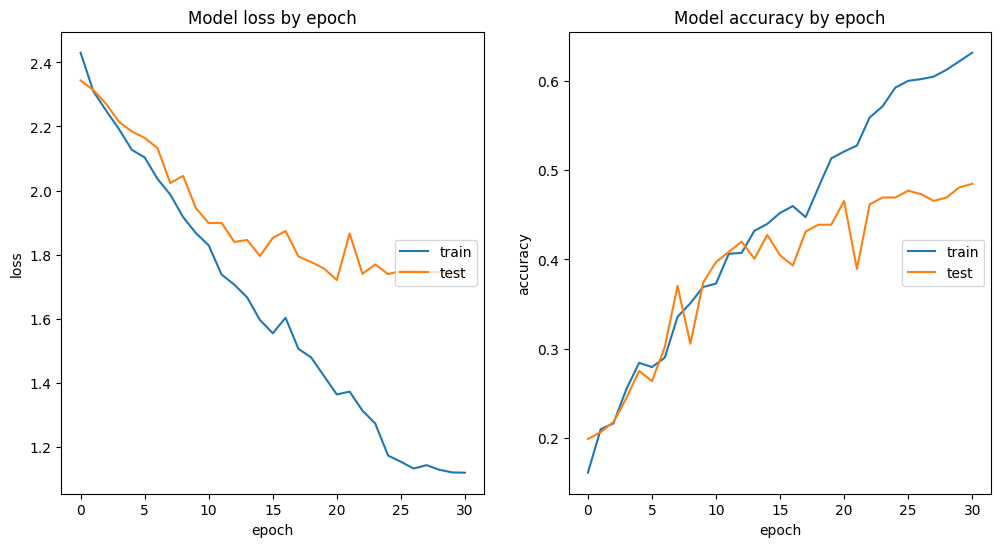

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

> D. CONFUSION MATRIX

In [17]:
####### PREDICTIONS #######
X_test = [load_image(directory = IMAGES_DIRECTORY,
                                 filename = x,
                                 channels = 1,
                                 size = TARGET_SIZE,
                                 preprocess = preprocess_input) for x in X_test_path]
y_prob = [lenet.predict(np.array([x], dtype=np.float32))[0] for x in X_test]

# Class predictions
y_pred = tf.argmax(y_prob, axis = -1).numpy()

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 4ms/step


In [18]:
# Decode as type
y_test = pd.Series(encoder.inverse_transform(y_test))
y_pred = pd.Series(encoder.inverse_transform(y_pred))

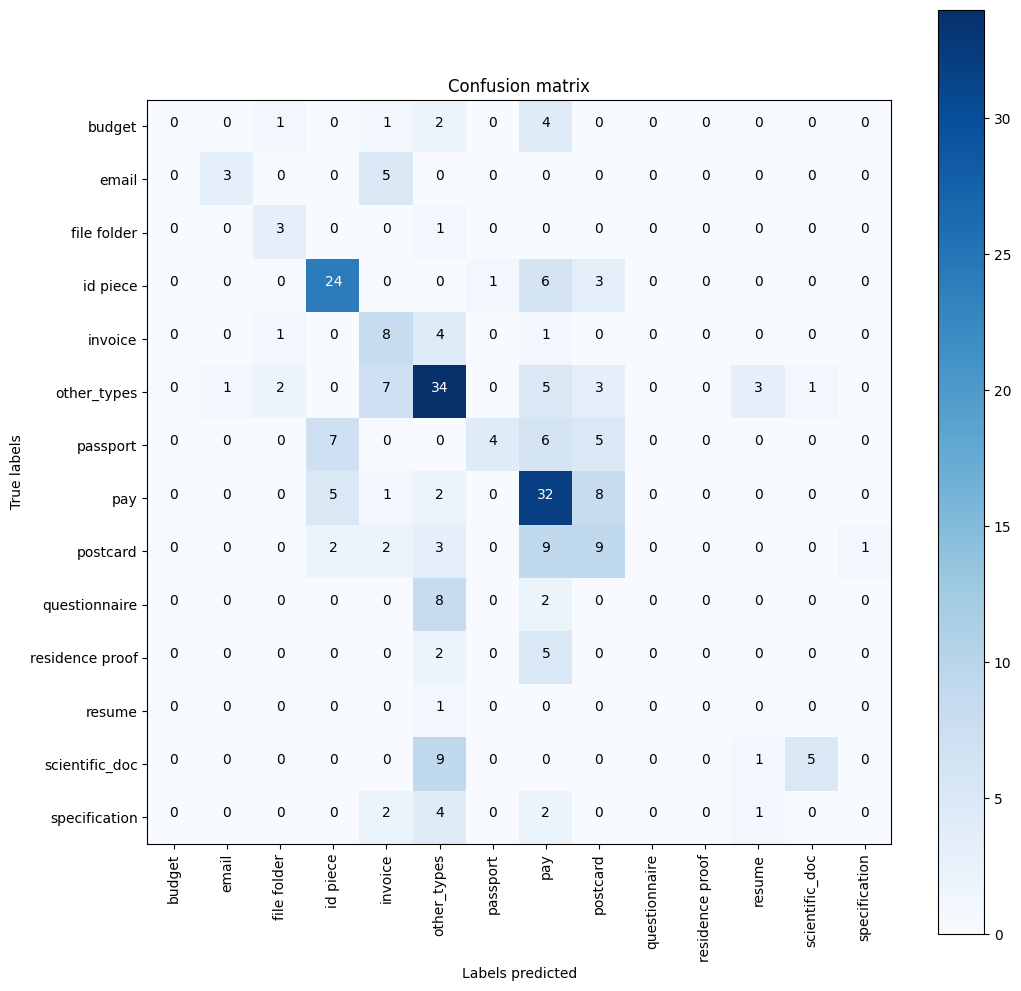

In [19]:
confusion_matrix(y_test, y_pred)

> E. CLASSIFICATION REPORT

In [20]:
global_classification_report(y_test, y_pred, classifier = "LeNet", category = "ComputerVision target_min")

                 precision    recall  f1-score   support

         budget       0.00      0.00      0.00         8
          email       0.75      0.38      0.50         8
    file folder       0.43      0.75      0.55         4
       id piece       0.63      0.71      0.67        34
        invoice       0.31      0.57      0.40        14
    other_types       0.49      0.61      0.54        56
       passport       0.80      0.18      0.30        22
            pay       0.44      0.67      0.53        48
       postcard       0.32      0.35      0.33        26
  questionnaire       0.00      0.00      0.00        10
residence proof       0.00      0.00      0.00         7
         resume       0.00      0.00      0.00         1
 scientific_doc       0.83      0.33      0.48        15
  specification       0.00      0.00      0.00         9

       accuracy                           0.47       262
      macro avg       0.36      0.32      0.31       262
   weighted avg       0.46   

C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\User

## The model LENET, too basic, does not provide interesting results. Therefore, next step will be to use pre-trained models.